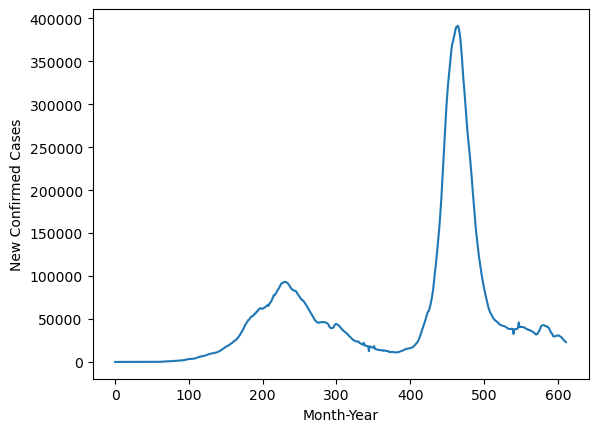

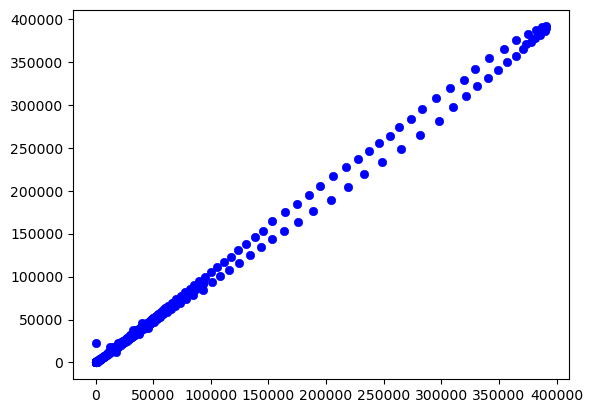

The correlation between lag 2 sequence and original is :  0.9962419074852336
The correlation between lag 3 sequence and original is :  0.9917489864794244
The correlation between lag 4 sequence and original is :  0.9855554656451243
The correlation between lag 5 sequence and original is :  0.9777141408998663
The correlation between lag 6 sequence and original is :  0.968278061970016


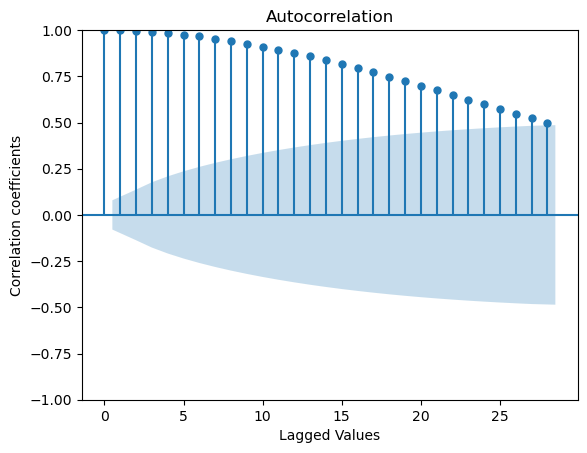

The coefficients obtained from the AR model are [ 5.99548333e+01  1.03675933e+00  2.61712336e-01  2.75612628e-02
 -1.75391955e-01 -1.52461366e-01]


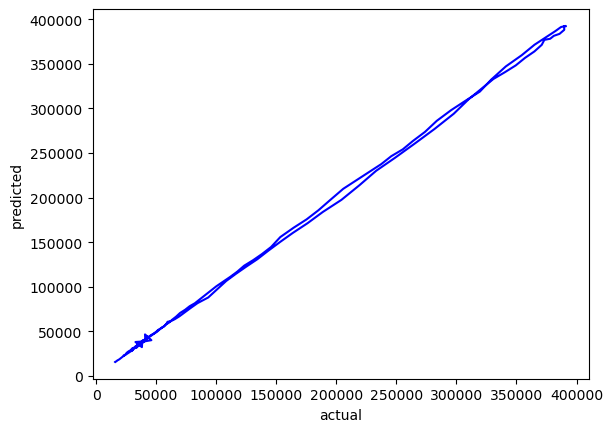

RMSE(%): 1.8247684769390204
MAPE: 1.5748363824058282
Table 1
    Lag value   RMSE(%)      MAPE
0          1  5.372948  3.446540
1          5  1.824768  1.574836
2         10  1.685532  1.519370
3         15  1.611935  1.496236
4         25  1.703391  1.535421


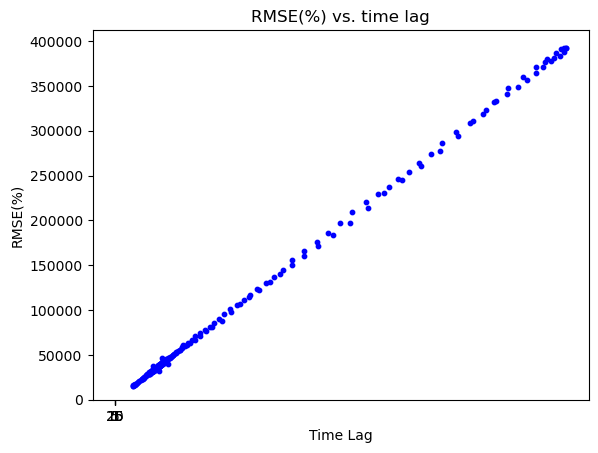

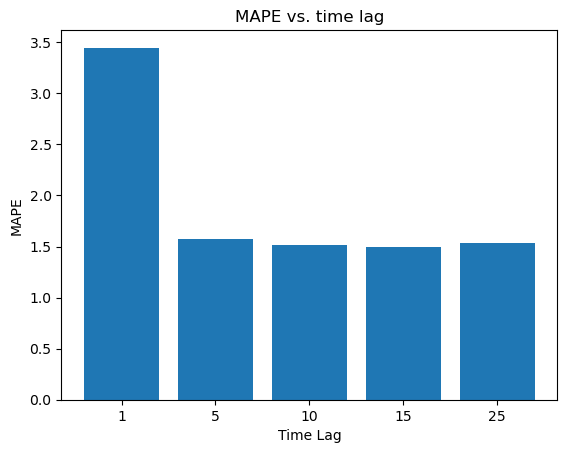

The heuristic value for the optimal number of lags is 77
RMSE(%): 1.7593780528866847
MAPE: 2.0264439052856087


In [9]:

 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
import math
from statsmodels.tsa.ar_model import AutoReg as AR
from sklearn.metrics import mean_squared_error

#reading dataframe
df = pd.read_csv(r"C:\Users\Vaishnavi\Downloads\daily_covid_cases.csv")
x=[]
for i in range(612):
    x.append(i)
y= df['new_cases']

plt.plot(x,y)
plt.xlabel('Month-Year')
plt.ylabel('New Confirmed Cases')
plt.show()


#converting a series into list 
y_L_0 = df['new_cases'].tolist()
#inserting 0 at places where after time lag remains empty
y_L_0.insert(612,0)
y_L_1 = df['new_cases'].tolist()
y_L_1.insert(0,0)
corr, _ = pearsonr(y_L_0, y_L_1)
corr


# scatter plot between lag of 1 and original
plt.scatter(y_L_0, y_L_1, c ="blue",linewidths=0.5)
  

plt.show()

# creating several lags
y_L_2=y_L_1.copy()
y_L_2.insert(0,0)

y_L_3=y_L_2.copy()
y_L_3.insert(0,0)

y_L_4=y_L_3.copy()
y_L_4.insert(0,0)

y_L_5=y_L_4.copy()
y_L_5.insert(0,0)

y_L_6=y_L_5.copy()
y_L_6.insert(0,0)

y_L_0.insert(613,0)

#finding correlation between the lags and original dataset
corr2, _ = pearsonr(y_L_0, y_L_2)
y_L_0.insert(614,0)
corr3, _ = pearsonr(y_L_0, y_L_3)
y_L_0.insert(615,0)
corr4, _ = pearsonr(y_L_0, y_L_4)
y_L_0.insert(616,0)
corr5, _ = pearsonr(y_L_0, y_L_5)
y_L_0.insert(617,0)
corr6, _ = pearsonr(y_L_0, y_L_6)

print("The correlation between lag 2 sequence and original is : ",corr2)
print("The correlation between lag 3 sequence and original is : ",corr3)
print("The correlation between lag 4 sequence and original is : ",corr4)
print("The correlation between lag 5 sequence and original is : ",corr5)
print("The correlation between lag 6 sequence and original is : ",corr6)


 
lag=[1,2,3,4,5,6]
sm.graphics.tsa.plot_acf(y)
plt.xlabel('Lagged Values')
plt.ylabel('Correlation coefficients')
plt.show()


#dividing the data into train part and test part 
series = pd.read_csv(r'C:\Users\Vaishnavi\Downloads\daily_covid_cases.csv',parse_dates=['Date'],index_col=['Date'],sep=',')
test_size = 0.35 # 35% for testing
X = series.values
tst_sz = math.ceil(len(X)*test_size)
train, test = X[:len(X)-tst_sz], X[len(X)-tst_sz:]

#lag set to 5
L=5
#training the model
model = AR(train, lags=L)
# fit/train the model
model_fit = model.fit() 
# Get the coefficients of AR model
coef = model_fit.params 
#printing the coefficients
print('The coefficients obtained from the AR model are', coef)


#using these coefficients walk forward over time steps in test, one step each time
history = train[len(train)-L:]
history = [history[i] for i in range(len(history))]

predictions = list() # List to hold the predictions, 1 step at a time
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-L,length)]
    yhat = coef[0] # Initialize to w0
    for d in range(L):
        yhat += coef[d+1] * lag[L-d-1] # Add other values
    obs = test[t]
    predictions.append(yhat) #Append predictions to compute RMSE later
    history.append(obs) # Append actual test value to history, to be used in next step.

plt.plot(test,predictions, color='blue')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()


# plotting actual vs predicted
plt.scatter(test,predictions, color='blue',s=10)
plt.xlabel('actual')
plt.ylabel('predicted')


# computing rmse
rmse_per = (math.sqrt(mean_squared_error(test, predictions))/np.mean(test))*100
print('RMSE(%):',rmse_per)

# computing MAPE
mape = np.mean(np.abs((test - predictions)/test))*100
print('MAPE:',mape)

# repeating the above process,starting from training model and then using coefficients for walk forward ovr time steps,for different lag values
lag_val = [1,5,10,15,25]
RMSE = []
MAPE = []
for l in lag_val:
    model = AutoReg(train, lags=l)
  # fit/train the model
    model_fit = model.fit()
    coef = model_fit.params 
    history = train[len(train)-l:]
    history = [history[i] for i in range(len(history))]
    predicted = list() # List to hold the predictions, 1 step at a time for t in range(len(test)):
    for t in range(len(test)):
        length = len(history)
        Lag = [history[i] for i in range(length-l,length)] 
        yhat = coef[0] # Initialize to w0
        for d in range(l):
             yhat += coef[d+1] * Lag[l-d-1] # Add other values 
        obs = test[t]
        predicted.append(yhat) #Append predictions to compute RMSE later
        history.append(obs) # Append actual test value to history, to be used in next step.

    # computing rmse
    rmse_per = (math.sqrt(mean_squared_error(test, predicted))/np.mean(test))*100
    RMSE.append(rmse_per)

    # computing MAPE
    mape = np.mean(np.abs((test - predicted)/test))*100
    MAPE.append(mape)

# RMSE (%) and MAPE between predicted and original data values wrt lags in time sequence
data = {'Lag value':lag_val,'RMSE(%)':RMSE, 'MAPE' :MAPE}
print('Table 1\n',pd.DataFrame(data))

# plotting RMSE(%) vs. time lag
plt.xlabel('Time Lag')
plt.ylabel('RMSE(%)')
plt.title('RMSE(%) vs. time lag')
plt.xticks([1,2,3,4,5],lag_val)
plt.bar([1,2,3,4,5],RMSE)
plt.show()

# plotting MAPE vs. time lag
plt.xlabel('Time Lag')
plt.ylabel('MAPE')
plt.title('MAPE vs. time lag')
plt.xticks([1,2,3,4,5],lag_val)
plt.bar([1,2,3,4,5],MAPE)
plt.show()


# computing number of optimal value of p
p = 1
while p < len(df):
  corr8,_ = pearsonr(train[p:].ravel(), train[:len(train)-p].ravel())
  if(abs(corr8) <= 2/math.sqrt(len(train[p:]))):
    print('The heuristic value for the optimal number of lags is',p-1)
    break
  p+=1

p=p-1
# training the model on optimal lag
model = AutoReg(train, lags=p)
# fit/train the model
model_fit = model.fit()
coef = model_fit.params 
history = train[len(train)-p:]
history = [history[i] for i in range(len(history))]
predicted = list() # List to hold the predictions, 1 step at a time for t in range(len(test)):
for t in range(len(test)):
    length = len(history)
    Lag = [history[i] for i in range(length-p,length)] 
    yhat = coef[0] # Initialize to w0
    for d in range(p):
        yhat += coef[d+1] * Lag[p-d-1] # Add other values 
    obs = test[t]
    predicted.append(yhat) #Append predictions to compute RMSE later
    history.append(obs) # Append actual test value to history, to be used in next step.

# computing rmse
rmse_per = (math.sqrt(mean_squared_error(test, predicted))/np.mean(test))*100
print('RMSE(%):',rmse_per)

# computing MAPE
mape = np.mean(np.abs((test - predicted)/test))*100
print('MAPE:',mape)